In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
#Reading the data
df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Car Sales Prediction\Car Sales Prediction\data\car_dataset.csv")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_21856\3551019881.py:2: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Car Sales Prediction\Car Sales Prediction\data\car_dataset.csv")


In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


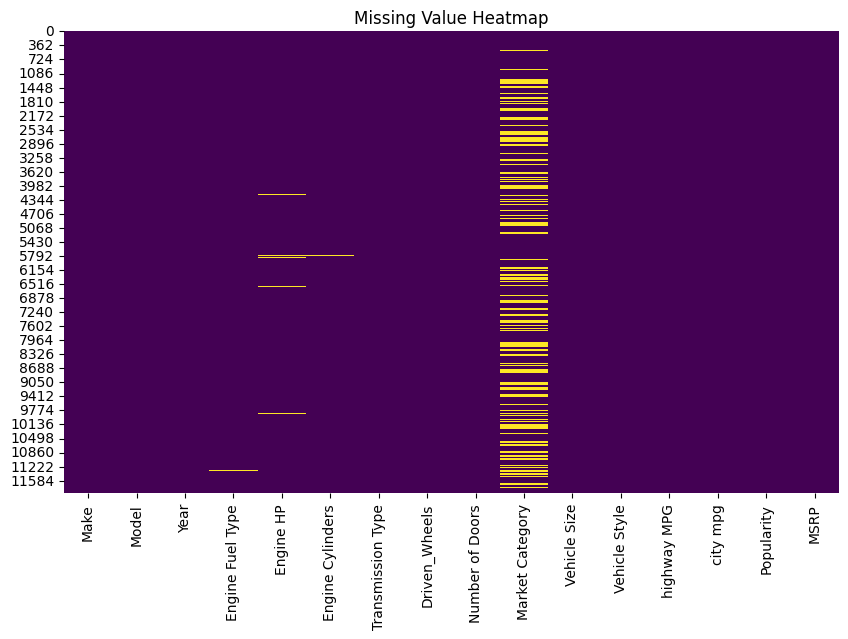

In [6]:
# Exploring th missing data
# Create a boolean mask of missing values
missing_heatmap = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_heatmap, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

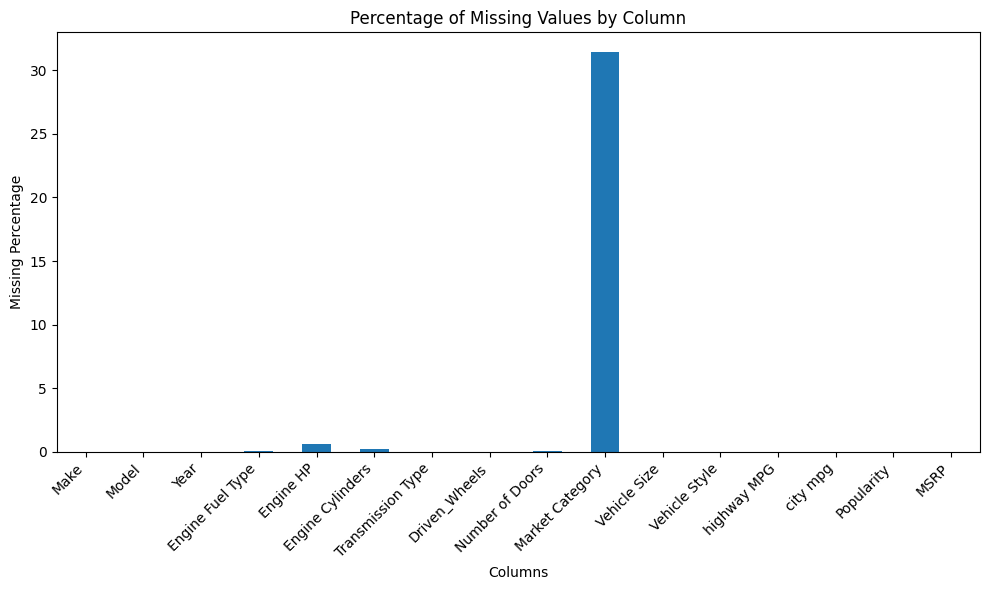

In [9]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



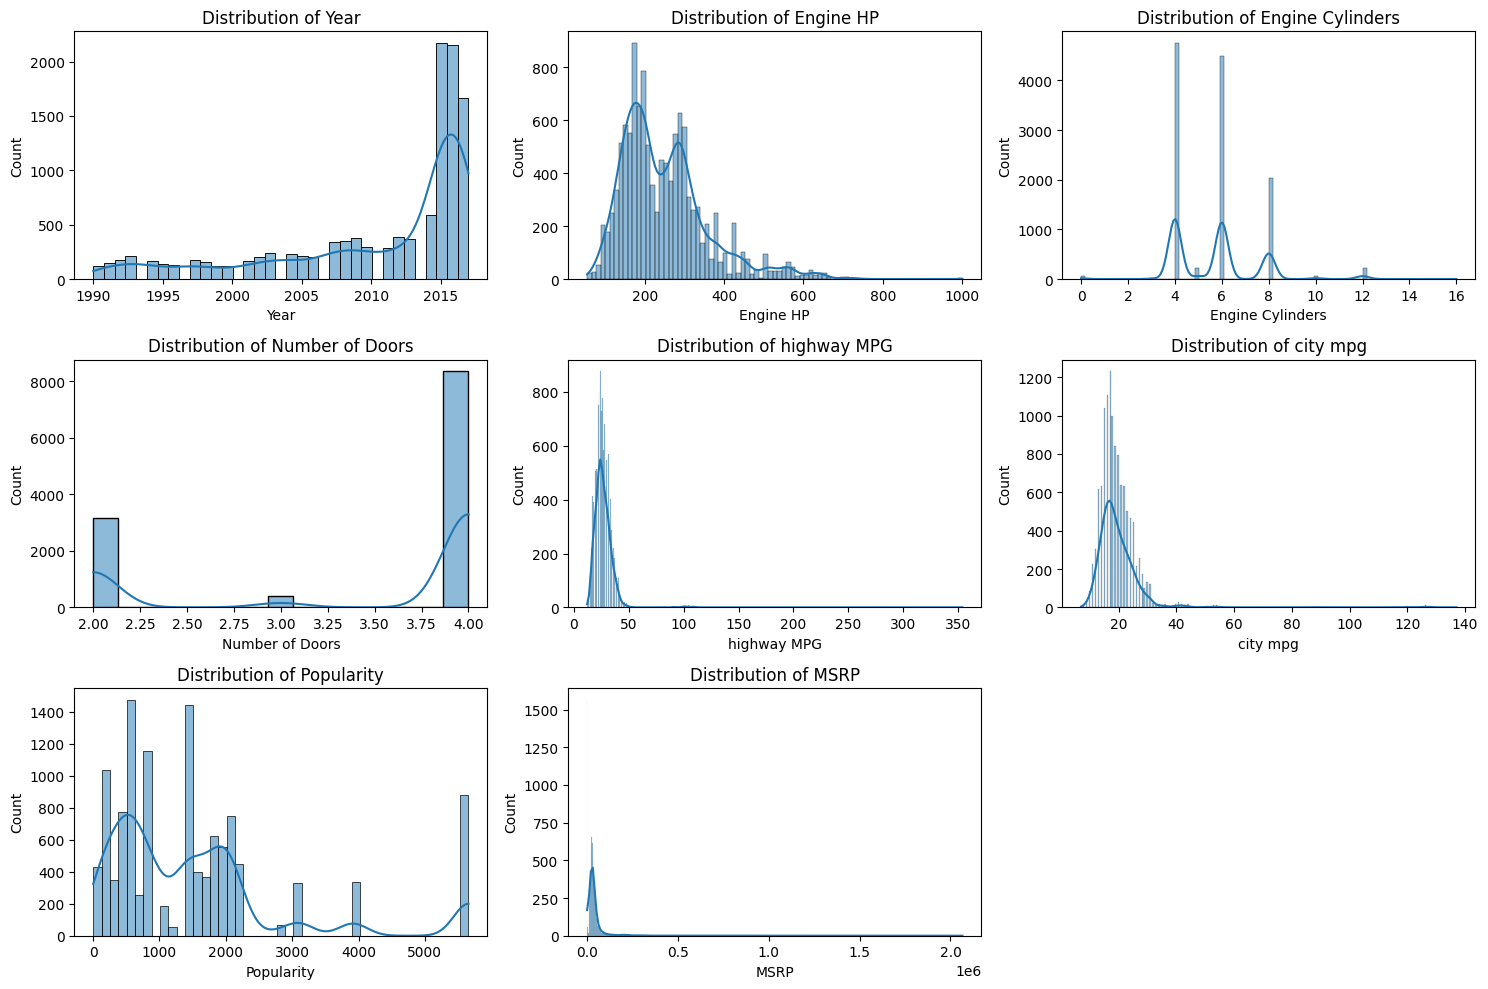

In [13]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


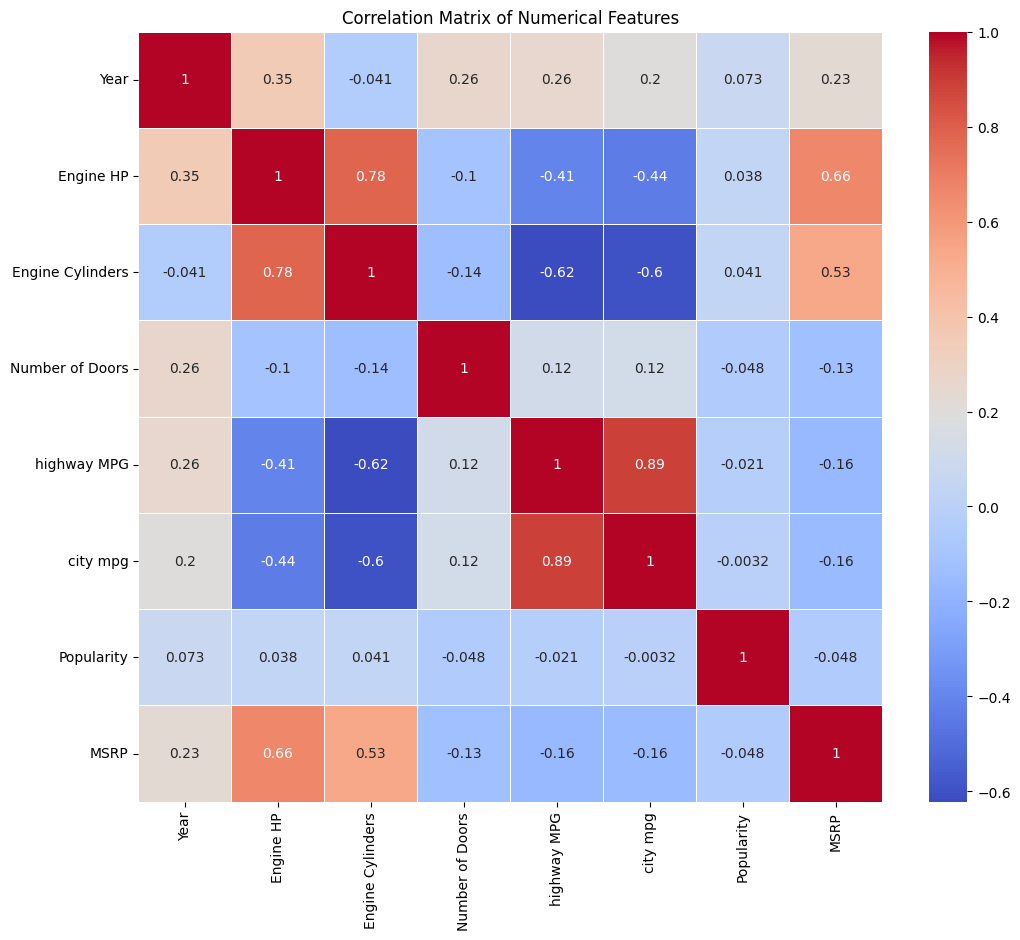

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='MSRP', ylabel='Engine HP'>

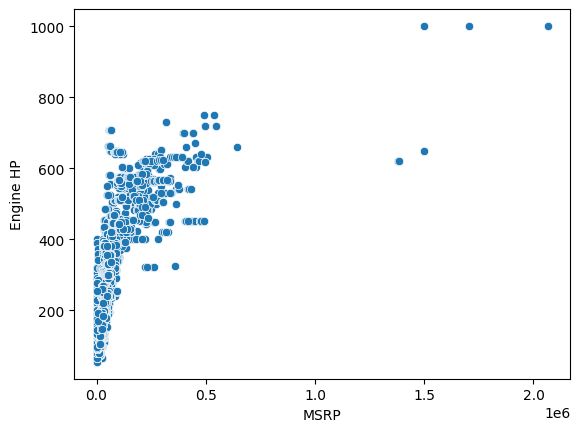

In [7]:
sns.scatterplot(df,x='MSRP',y='Engine HP')

<Axes: xlabel='highway MPG', ylabel='MSRP'>

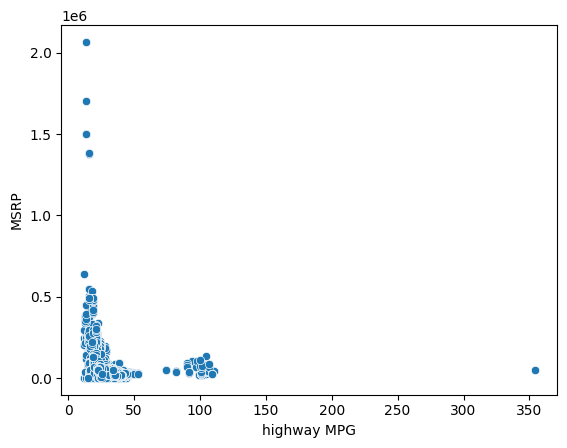

In [6]:
sns.scatterplot(df,x='highway MPG',y='MSRP')

In [8]:
df.drop(columns='Market Category',axis=1, inplace=True)

In [9]:
EnginecylinMed = df['Engine Cylinders'].median()

In [10]:
df['Engine Cylinders']=df['Engine Cylinders'].fillna(value=EnginecylinMed)

In [11]:
HPMedian=df['Engine HP'].median()

In [12]:
df['Engine HP']=df['Engine HP'].fillna(HPMedian)

In [13]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [14]:
df=df.dropna(subset=['Engine Fuel Type','Number of Doors'])

In [15]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [16]:
categoricalCols= df.select_dtypes(include=['object']).columns


In [83]:
categoricalCols

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [15]:
df=pd.get_dummies(df,categoricalCols,drop_first=True)

In [85]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False


In [16]:
y=df['MSRP']


In [17]:
X = df.drop(columns='MSRP',axis=1)

In [18]:
import numpy as np

y = np.log1p(y)  # log(1 + y) to handle zeros


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.linear_model import ElasticNet

In [26]:
elastic_model=ElasticNet(max_iter=10000)

In [44]:
grid_param={'alpha':[0.1,0.4,0.7, 1.0, 10.0] ,'l1_ratio':[0.1,0.25,0.5,0.7,1]}

In [45]:
grid_model=GridSearchCV(estimator=elastic_model,param_grid=grid_param,cv=5)

In [46]:
grid_model.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.1, 0.4, 0.7, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.7, 1]})

In [47]:
preds=grid_model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mean_absolute_error(y_test,preds)

0.22919005772286874

In [50]:
np.sqrt(mean_squared_error(y_test,preds))

0.3131212634674578

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
decTree=DecisionTreeRegressor()

In [54]:
decTree.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [57]:
tree_preds=decTree.predict(X_test_scaled)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [58]:
mean_absolute_error(y_test,tree_preds)

0.07914936351493834

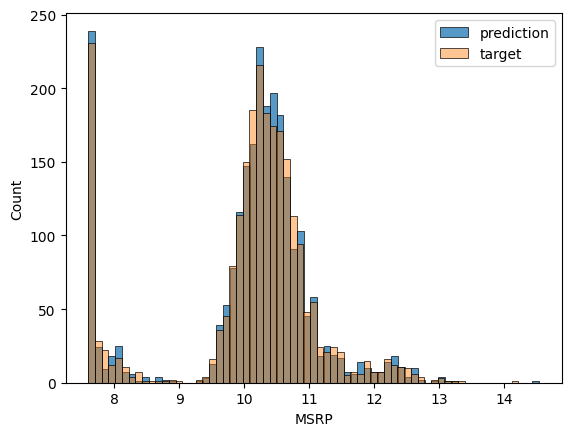

In [59]:
sns.histplot(tree_preds, label='prediction')
sns.histplot(y_test, label='target',alpha=0.45)
plt.legend()

**As Concluded the decision tree regressor was better for the data than the elastic net model with grid search**